In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# some aesthetic setting for plotting for the rest of the notebook
sns.set()
plt.rcParams['figure.figsize'] = (12, 6)

In [58]:
temp = pd.read_csv('DataTemp/Data01mean/Tempdatamean.csv',index_col = 1 , parse_dates=True)

In [59]:
temp.head(5)

,SOUID,TG,Q_TG
DATE,,,
1876-01-01,127488,22,0
1876-01-02,127488,25,0
1876-01-03,127488,3,0
1876-01-04,127488,-58,0
1876-01-05,127488,-98,0


In [60]:
temp.loc[temp[' Q_TG'] == 9 ]

,SOUID,TG,Q_TG
DATE,,,
1945-04-25,127488,-9999,9
1945-04-26,127488,-9999,9
1945-04-27,127488,-9999,9
1945-04-28,127488,-9999,9
1945-04-29,127488,-9999,9
...,...,...,...
1945-11-01,127488,-9999,9
1945-11-02,127488,-9999,9
1945-11-03,127488,-9999,9


In [61]:
temp.loc[temp[' Q_TG'] == 1 ]

,SOUID,TG,Q_TG
DATE,,,
1947-01-21,127488,-27,1


In [62]:
temp['1947-01-19':'1947-01-23']

,SOUID,TG,Q_TG
DATE,,,
1947-01-19,128124,10,0
1947-01-20,128124,-13,0
1947-01-21,127488,-27,1
1947-01-22,128124,-28,0
1947-01-23,128124,-38,0


In [63]:
temp.columns

Index([' SOUID', '   TG', ' Q_TG'], dtype='object')

In [64]:
temp.rename(columns={'   TG' : 'meantemperature'}, inplace=True)

In [65]:
temp.rename_axis('Date',inplace=True)

In [66]:
temp.index[1490:1510]

DatetimeIndex(['1880-01-30', '1880-01-31', '1880-02-01', '1880-02-02',
               '1880-02-03', '1880-02-04', '1880-02-05', '1880-02-06',
               '1880-02-07', '1880-02-08', '1880-02-09', '1880-02-10',
               '1880-02-11', '1880-02-12', '1880-02-13', '1880-02-14',
               '1880-02-15', '1880-02-16', '1880-02-17', '1880-02-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [67]:
temp['meantemperature'] = temp['meantemperature'] *0.1

In [68]:
temp.loc[temp['meantemperature'] < -100 ]

,SOUID,meantemperature,Q_TG
Date,,,
1945-04-25,127488,-999.9,9
1945-04-26,127488,-999.9,9
1945-04-27,127488,-999.9,9
1945-04-28,127488,-999.9,9
1945-04-29,127488,-999.9,9
...,...,...,...
1945-11-01,127488,-999.9,9
1945-11-02,127488,-999.9,9
1945-11-03,127488,-999.9,9


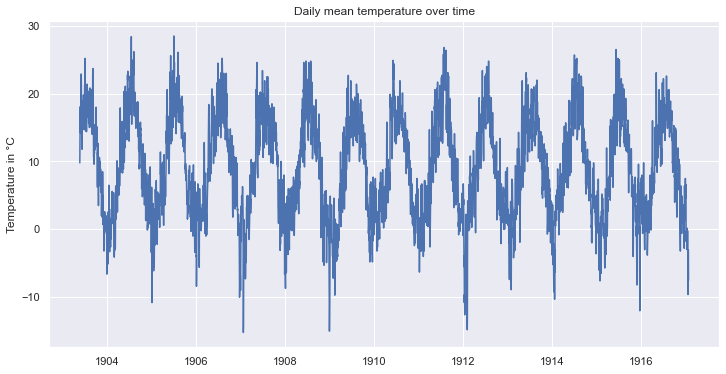

In [69]:
plt.title("Daily mean temperature over time")
plt.ylabel('Temperature in °C')
#plt.ylim(-20,40)
plt.plot(temp.index[10000:15000],temp['meantemperature'][10000:15000])

In [70]:
wtemp = temp.drop([' SOUID',' Q_TG'],axis=1)
wtemp

,meantemperature
Date,
1876-01-01,2.2
1876-01-02,2.5
1876-01-03,0.3
1876-01-04,-5.8
1876-01-05,-9.8
...,...
2022-02-24,5.9
2022-02-25,4.4
2022-02-26,4.1


In [71]:
wtemp = wtemp.loc[wtemp['meantemperature'] > -100]

In [72]:
wtemp

,meantemperature
Date,
1876-01-01,2.2
1876-01-02,2.5
1876-01-03,0.3
1876-01-04,-5.8
1876-01-05,-9.8
...,...
2022-02-24,5.9
2022-02-25,4.4
2022-02-26,4.1


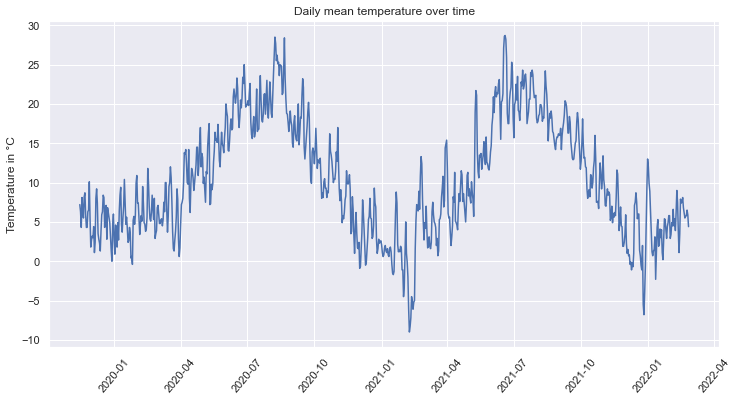

In [73]:
plt.title("Daily mean temperature over time")
plt.ylabel('Temperature in °C')
plt.xticks(rotation = 50)
plt.plot(wtemp['2019-11-15':'2022-02-25'])

In [74]:
type(wtemp.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [75]:
wtemp.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           dtype='int64', name='Date', length=53190)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
wtemp['timestep'] = range(len(wtemp))

C:\Users\aoe\AppData\Local\Temp/ipykernel_7348/2948537851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wtemp['timestep'] = range(len(wtemp))


In [78]:
X = wtemp[['timestep']] # matrix (or DataFrame)
y = wtemp['meantemperature'] # vector (or Series)

In [79]:
m = LinearRegression()

In [80]:
m.fit(X, y)

LinearRegression()

In [81]:
wtemp['trend'] = m.predict(X)

C:\Users\aoe\AppData\Local\Temp/ipykernel_7348/4116631560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wtemp['trend'] = m.predict(X)


<AxesSubplot:xlabel='Date'>

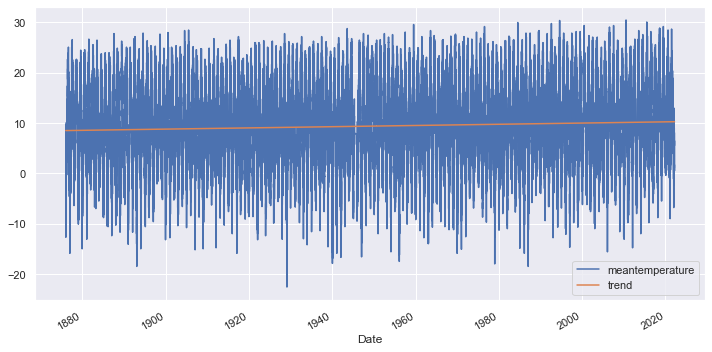

In [82]:
wtemp[['meantemperature', 'trend']].plot()

C:\Users\aoe\AppData\Local\Temp/ipykernel_7348/726575517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wtemp['wo_trend'] = wtemp['meantemperature'] - wtemp['trend']


<AxesSubplot:xlabel='Date'>

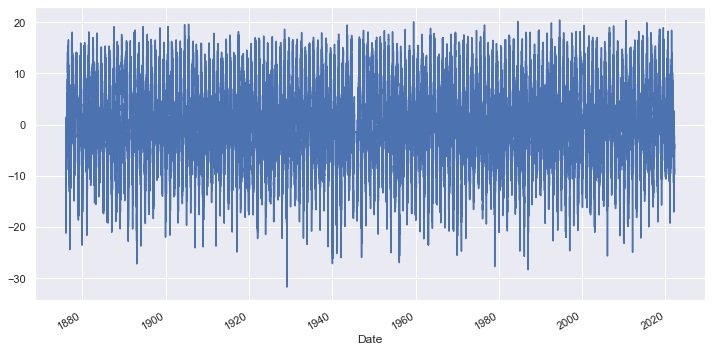

In [83]:
wtemp['wo_trend'] = wtemp['meantemperature'] - wtemp['trend']

wtemp['wo_trend'].plot()

In [84]:
# One-Hot-Encoding the month
seasonal_dummies = pd.get_dummies(wtemp.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(wtemp.index)

In [85]:
seasonal_dummies

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Date,,,,,,,,,,,
1876-01-01,0,0,0,0,0,0,0,0,0,0,0
1876-01-02,0,0,0,0,0,0,0,0,0,0,0
1876-01-03,0,0,0,0,0,0,0,0,0,0,0
1876-01-04,0,0,0,0,0,0,0,0,0,0,0
1876-01-05,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,1,0,0,0,0,0,0,0,0,0,0
2022-02-25,1,0,0,0,0,0,0,0,0,0,0
2022-02-26,1,0,0,0,0,0,0,0,0,0,0


In [86]:
# join the dummies with the flights data frame
wtemp = wtemp.join(seasonal_dummies)

In [87]:
wtemp.head()

,meantemperature,timestep,trend,wo_trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Date,,,,,,,,,,,,,,,
1876-01-01,2.2,0,8.511867,-6.311867,0,0,0,0,0,0,0,0,0,0,0
1876-01-02,2.5,1,8.511900,-6.011900,0,0,0,0,0,0,0,0,0,0,0
1876-01-03,0.3,2,8.511934,-8.211934,0,0,0,0,0,0,0,0,0,0,0
1876-01-04,-5.8,3,8.511967,-14.311967,0,0,0,0,0,0,0,0,0,0,0
1876-01-05,-9.8,4,8.512000,-18.312000,0,0,0,0,0,0,0,0,0,0,0


In [88]:
# Define X and y
X = wtemp.drop(columns=['meantemperature', 'trend', 'wo_trend'])  # thus keeping timestep and months' dummies

# y is already defined (the meantemperature)

In [89]:
m.fit(X, y)
# Create a model with trend and seasonality
wtemp['trend + seasonal'] = m.predict(X)
wtemp.head()

,meantemperature,timestep,trend,wo_trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend + seasonal
Date,,,,,,,,,,,,,,,,
1876-01-01,2.2,0,8.511867,-6.311867,0,0,0,0,0,0,0,0,0,0,0,-0.868683
1876-01-02,2.5,1,8.511900,-6.011900,0,0,0,0,0,0,0,0,0,0,0,-0.868649
1876-01-03,0.3,2,8.511934,-8.211934,0,0,0,0,0,0,0,0,0,0,0,-0.868616
1876-01-04,-5.8,3,8.511967,-14.311967,0,0,0,0,0,0,0,0,0,0,0,-0.868582
1876-01-05,-9.8,4,8.512000,-18.312000,0,0,0,0,0,0,0,0,0,0,0,-0.868549


<AxesSubplot:xlabel='Date'>

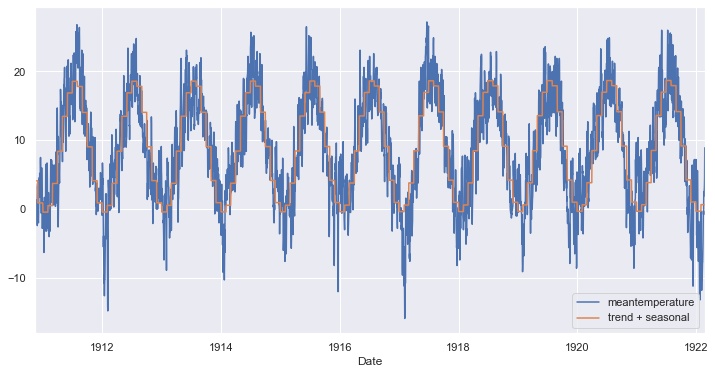

In [90]:
wtemp['1910-11-15':'1922-02-25'][['meantemperature', 'trend + seasonal']].plot()

In [91]:
wtemp['remainder'] = wtemp['meantemperature'] - wtemp['trend + seasonal']

<AxesSubplot:xlabel='Date'>

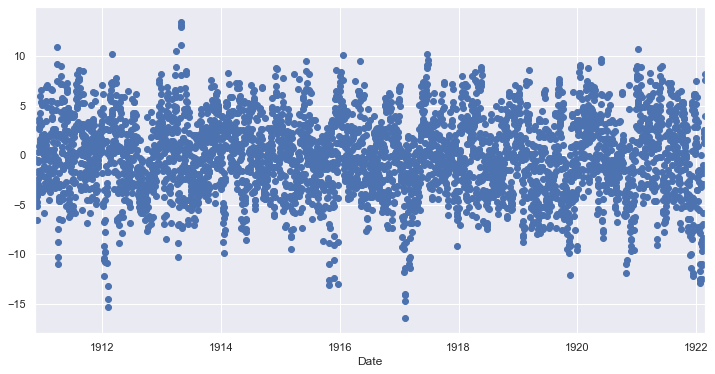

In [92]:
wtemp['1910-11-15':'1922-02-25']['remainder'].plot(style='o')

In [93]:
wtemp['remainder'].to_csv('wtemp_remainder_month.csv')

In [94]:
wtemp.columns

Index(['meantemperature', 'timestep', 'trend', 'wo_trend', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'trend + seasonal',
       'remainder'],
      dtype='object')

In [95]:
rtemp = wtemp.drop(columns=['meantemperature','timestep' ,'trend', 'wo_trend','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12','trend + seasonal'])

In [96]:
rtemp['lag1'] = rtemp['remainder'].shift(1)

rtemp.head()

,remainder,lag1
Date,,
1876-01-01,3.068683,NaN
1876-01-02,3.368649,3.068683
1876-01-03,1.168616,3.368649
1876-01-04,-4.931418,1.168616
1876-01-05,-8.931451,-4.931418


In [ ]:
rtemp.corr()

In [ ]:
sns.scatterplot(x='lag1', y='remainder', data=rtemp);

In [ ]:
sns.regplot(data = rtemp, x = 'lag1', y = 'remainder')

In [ ]:
rtemp.dropna(inplace=True)

In [ ]:
rtemp.head()

In [ ]:
X = rtemp[['lag1']]
y = rtemp['remainder']

In [ ]:
# Create and fit the model
m = LinearRegression()
m.fit(X, y)

In [ ]:
# Create predictions
rtemp['predictions_ar1'] = m.predict(X)
rtemp.head()

In [ ]:
m.coef_

In [ ]:
# Plot the data
def plot_remainder(df, 
                   title='meantemperature by day over time'):
    '''
    Custom plotting function for plotting the flights dataset
    
    Parameters
    ----------
    df : pd.DataFrame
        The data to plot.
    title : str
        The title of the plot
    ylim : bool
        Whether to fix the minimum value of y; defalut is True
    
    Returns
    -------
    Plots the data
    '''
    df.plot()
    plt.title(title)
    plt.ylabel('# of Passengers in 1000')
    plt.show()

In [ ]:
# Plot the original remainder and the prediction
plot_remainder(rtemp['1915-11-15':'1917-02-25'][['remainder', 'predictions_ar1']])

In [ ]:
rtemp['lag2'] = rtemp['remainder'].shift(2)


In [ ]:
rtemp.head()

In [ ]:
sns.scatterplot(x='lag2', y='remainder', data=rtemp);

In [81]:
round(rtemp[['remainder', 'lag1', 'lag2']].corr(), 2)

,remainder,lag1,lag2
remainder,1.0,0.8,0.6
lag1,0.8,1.0,0.8
lag2,0.6,0.8,1.0


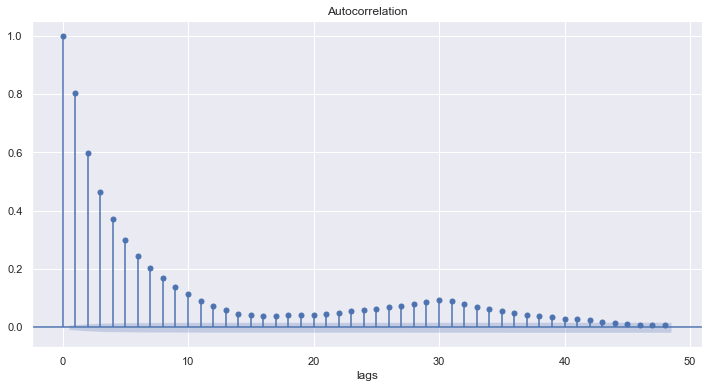

In [99]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(rtemp['remainder'])
plt.xlabel('lags');

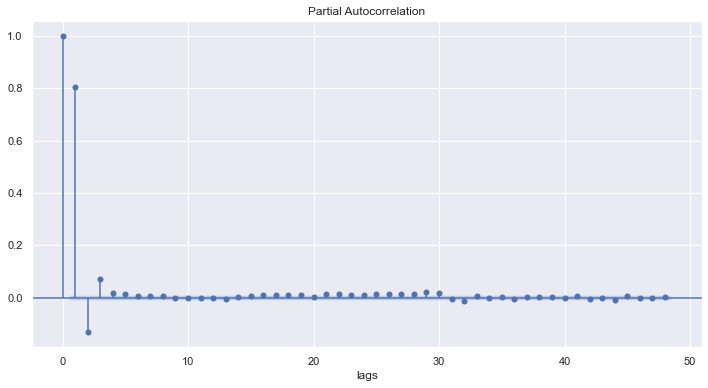

In [100]:
# Statsmodels provides a function called plot_pacf
# plot partial autocorrelation function
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(rtemp['remainder'])
plt.xlabel('lags');

In [101]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
selected_order = ar_select_order(rtemp['remainder'], maxlag = 12)

C:\Users\aoe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\aoe\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\aoe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [102]:
selected_order.ar_lags

array([1, 2, 3, 4])

In [103]:
wtemp.columns

Index(['meantemperature', 'timestep', 'trend', 'wo_trend', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'trend + seasonal',
       'remainder'],
      dtype='object')

In [104]:
Ntemp = wtemp.drop(columns=['trend', 'wo_trend','trend + seasonal'])

In [105]:
Ntemp['lag1'] = Ntemp['remainder'].shift(1)
Ntemp['lag2'] = Ntemp['remainder'].shift(2)

In [106]:
Ntemp['lag3'] = Ntemp['remainder'].shift(3)
Ntemp['lag4'] = Ntemp['remainder'].shift(4)

In [107]:
Ntemp.head(5)

,meantemperature,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,remainder,lag1,lag2,lag3,lag4
Date,,,,,,,,,,,,,,,,,,
1876-01-01,2.2,0,0,0,0,0,0,0,0,0,0,0,0,3.068683,NaN,NaN,NaN,NaN
1876-01-02,2.5,1,0,0,0,0,0,0,0,0,0,0,0,3.368649,3.068683,NaN,NaN,NaN
1876-01-03,0.3,2,0,0,0,0,0,0,0,0,0,0,0,1.168616,3.368649,3.068683,NaN,NaN
1876-01-04,-5.8,3,0,0,0,0,0,0,0,0,0,0,0,-4.931418,1.168616,3.368649,3.068683,NaN
1876-01-05,-9.8,4,0,0,0,0,0,0,0,0,0,0,0,-8.931451,-4.931418,1.168616,3.368649,3.068683


In [108]:
Ntemp.dropna(inplace = True)

In [ ]:
Ntemp.head(3)

In [109]:
X = Ntemp.drop(columns=['meantemperature','remainder']) # matrix (or DataFrame)
y = Ntemp['meantemperature'] # vector (or Series)

In [110]:
mN = LinearRegression()
mN.fit(X, y)

LinearRegression()

In [111]:
Ntemp['remainder_predict'] = mN.predict(X)

<AxesSubplot:xlabel='Date'>

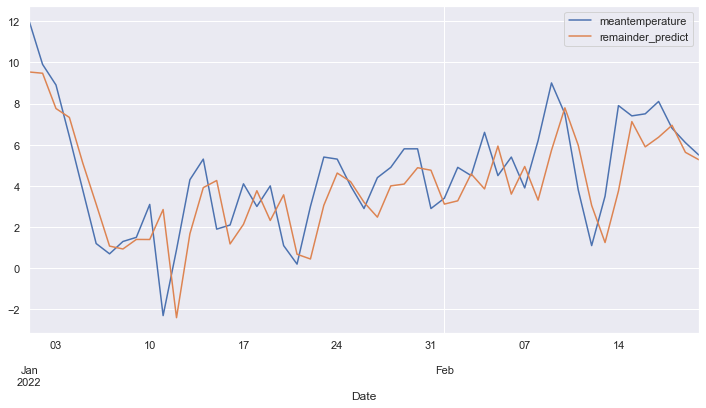

In [112]:
Ntemp['2022-01-01':'2022-02-20'][['meantemperature', 'remainder_predict']].plot()

**Evaluate model**

In [117]:
X.tail(5)

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
Date,,,,,,,,,,,,,,,,
2022-02-24,53185,1,0,0,0,0,0,0,0,0,0,0,4.636217,3.936251,3.836284,3.636318
2022-02-25,53186,1,0,0,0,0,0,0,0,0,0,0,4.036184,4.636217,3.936251,3.836284
2022-02-26,53187,1,0,0,0,0,0,0,0,0,0,0,2.536150,4.036184,4.636217,3.936251
2022-02-27,53188,1,0,0,0,0,0,0,0,0,0,0,2.236117,2.536150,4.036184,4.636217
2022-02-28,53189,1,0,0,0,0,0,0,0,0,0,0,-1.363916,2.236117,2.536150,4.036184


In [119]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
# Create a TimeSeriesSplit object
ts_split = TimeSeriesSplit(n_splits=100)

In [120]:
# Split the training data into folds
for i, (train_index, validation_index) in enumerate(ts_split.split(X, y)):
    print(f"""The training data for the {i+1}th iteration are the observations steps 
    {train_index}""")
    print(f"""The validation data for the {i+1}th iteration are the observations steps
    {validation_index}""")
    print('\n')

The training data for the 1th iteration are the observations steps 
    [   0    1    2 ... 4833 4834 4835]
The validation data for the 1th iteration are the observations steps
    [4836 4837 4838 ... 9668 9669 9670]


The training data for the 2th iteration are the observations steps 
    [   0    1    2 ... 9668 9669 9670]
The validation data for the 2th iteration are the observations steps
    [ 9671  9672  9673 ... 14503 14504 14505]


The training data for the 3th iteration are the observations steps 
    [    0     1     2 ... 14503 14504 14505]
The validation data for the 3th iteration are the observations steps
    [14506 14507 14508 ... 19338 19339 19340]


The training data for the 4th iteration are the observations steps 
    [    0     1     2 ... 19338 19339 19340]
The validation data for the 4th iteration are the observations steps
    [19341 19342 19343 ... 24173 24174 24175]


The training data for the 5th iteration are the observations steps 
    [    0     1     2 ...

In [121]:
# Create the time series split
time_series_split = ts_split.split(X, y) 

In [123]:
# Do the cross validation: Remember these are the 'test scores' in the training data.
result = cross_val_score(estimator=mN, 
                         X=X, y=y,
                         cv=time_series_split)
result

array([0.91959526, 0.90706287, 0.89410998, 0.91589046, 0.91525321,
       0.91222875, 0.91272899, 0.9041896 , 0.91775548, 0.92084727])

In [124]:
result.mean()

0.9119661869941209